In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor
from sklearn import  metrics


In [ ]:
# house_price_dataset=sklearn.datasets.load_boston()
# The error occurs because load_boston() has been removed from scikit-learn since version 1.2 due to ethical and privacy concerns around the dataset.
house_price_dataset = fetch_california_housing()

In [ ]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# loading the dataset to a pandas dataframe

In [ ]:
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names) #imported only data not price

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# adding the target price  column to the dataframe
house_price_dataframe['price']=house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# checking no. of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [ ]:
# we need to check missing values_cant feed dataset with missing values directly to our model
house_price_dataframe.isnull().sum()
# no missing values here -> we can proceed

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
#statistical measures of the dataset:standard deviation mean percentage etc

In [ ]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# understaning correlation between various features in the dataset
# +ve cor: one increases other increases

In [ ]:
correlation=house_price_dataframe.corr()

<Axes: >

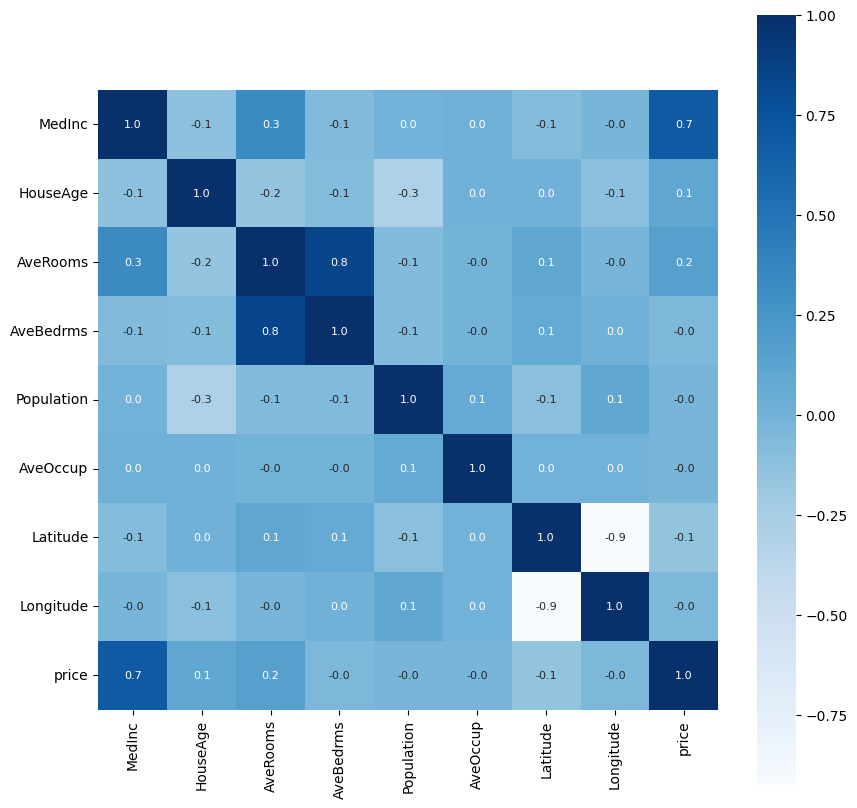

In [ ]:
# constructing heatmap to understand correlation cbar=true(means we want colorbar in the graph)
# fmt:no of float points u want
# annot=feature names like medinc houseage etc
# white box means negatively correlated
# simply this graph represents if one value increases then the other value....
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')


In [ ]:
# split data into labels(price)
# feed this label to algo of our ml model
# it will find pattern bw price and data
#thats how it will learn from data
# axis =1 = column

In [ ]:
x= house_price_dataframe.drop(['price'],axis=1)
y=house_price_dataframe['price']

In [ ]:
print(x)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64


In [ ]:
# spliting data into training data and test data
# training 80% data(x_train) and its corresponding label will be stored in y_train
# in testing (x_test) we have 20% OF OUR data and its corresponding labels in y_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [ ]:
# model training
# model used:xgboost regressor:decision tree model

In [ ]:
model=XGBRegressor()

In [ ]:
# training model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluation
# prediction on training data
# accuracy for prediction on training data

In [ ]:
training_data_prediction=model.predict(x_train)

In [ ]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [ ]:
print(y_train)

2072     0.720
10600    2.741
2494     0.583
4284     2.000
16541    1.179
         ...  
1099     0.938
18898    1.031
11798    1.926
6637     1.535
2575     0.811
Name: price, Length: 16512, dtype: float64


In [ ]:
# comparng predicited vales with original values
#  r squared error
score_1=metrics.r2_score(y_train,training_data_prediction)
# mean absolute error{subtrcs predicted values from the original values}
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)

In [ ]:
# lesser value(close to 0):more accurate the model is
print("R squared error",score_1)
print("mean absolute error",score_2)
# error is pretty small,model is perfroming good
# we can get more accuracy by training our model on more data

R squared error 0.943650140819218
mean absolute error 0.1933648700612105


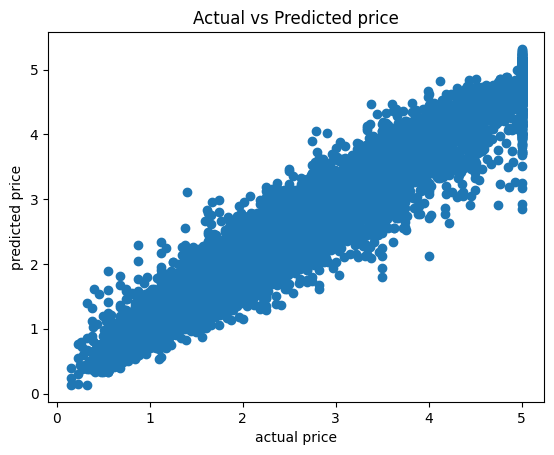

In [ ]:
# plotting graph to see how close y_train and predicting data is
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual vs Predicted price")
plt.show()

prediction on test data
predicitng on 20% data

In [ ]:
test_data_prediction=model.predict(x_test)

In [ ]:
score_1=metrics.r2_score(y_test,test_data_prediction)
# mean absolute error{subtrcs predicted values from the original values}
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)
print("R squared error",score_1)
print("mean absolute error",score_2)

R squared error 0.8338000331788725
mean absolute error 0.3108631800268186


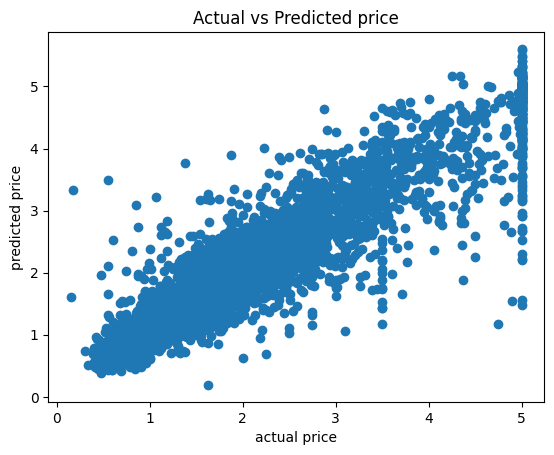

In [ ]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual vs Predicted price")
plt.show()